In [36]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array
global model
import cv2
import dlib
import imutils
from imutils.face_utils import *

import requests as req
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

model = load_model('./beauty_detector/faceRank.h5')
model.load_weights('./beauty_detector/faceRank_weights.h5')

Predict Score : 69.64885234832764


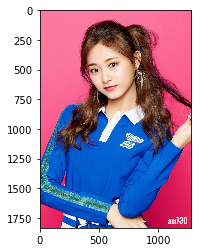

In [41]:
def get_face(img):
    global detector ,landmark_predictor
    #宣告臉部偵測器，以及載入預訓練的臉部特徵點模型
    detector = dlib.get_frontal_face_detector()
    landmark_predictor = dlib.shape_predictor('./beauty_detector/shape_predictor_68_face_landmarks.dat')
    
    #產生臉部識別
    face_rects = detector(img, 1)
    for i, d in enumerate(face_rects):
        #讀取框左上右下座標
        x1 = d.left()
        y1 = d.top()
        x2 = d.right()
        y2 = d.bottom()
        #根據此座標範圍讀取臉部特徵點
        shape = landmark_predictor(img, d)
        #將特徵點轉為numpy
        shape = shape_to_np(shape)# (68,2)    
        # 透過dlib挖取臉孔部分，將臉孔圖片縮放至256*256的大小，並存放於pickle檔中
        # 人臉圖像部分呢。很簡單，只要根據畫框的位置切取即可crop_img = img[y1:y2, x1:x2, :]
        crop_img = img[y1:y2, x1:x2, :]   
        try:
            crop_img = cv2.resize(crop_img, (128, 128))         
            return crop_img   
        except:
            return np.array([0])  
    return np.array([0]) 


def predict_image(img_url):  
    headers = {
        'user-agent': 'Mozilla/5.0 (Macintosh Intel Mac OS X 10_13_4) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/66.0.3359.181 Safari/537.36'}
    response = req.get(img_url, headers=headers)
    image = Image.open(BytesIO(response.content))  
    plt.imshow(image)

    opencvImage = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)  # predict target
    face = get_face(opencvImage)
    face = face.astype('float32')
    face /= 255  
    image = img_to_array(face)
    img = image[np.newaxis,:,:]
    # plt.axis('off')
    # plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    print("Predict Score : {}".format(model.predict(img)[0][0] * 20))  
    
url = 'https://d2e7nuz2r6mjca.cloudfront.net/2017/12/1514438769_2q-1280w.jpg'      
predict_image(url)